In [10]:
import os 
import numpy as np 
EMDB_PDB_ids_training = ["0026_6gl7", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_test = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq", "7573_6crv", "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_test
emdb_to_pdb_dict = {k:k.split("_")[1] for k in EMDB_PDB_ids_all}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}
res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

refined_bfactor_models_dir = "/home/abharadwaj1/papers/elife_paper/figure_information/data/refined_hybrid_atomic_models/servalcat_cycle_10"
local_resolution_data_dir = "/home/abharadwaj1/dev/data/local_resolutions/FDR_FSC"
atomic_model_data_dir = "/home/abharadwaj1/dev/data/atomic_model_mask"

In [11]:
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc 
import matplotlib.pyplot as plt
import seaborn as sns

emdb_local_resolution_paths = {}
emdb_hybrid_model_paths = {}
emdb_atomic_model_paths = {}

for emdb_pdb in EMDB_PDB_ids_all:
    emdb = emdb_pdb.split("_")[0]
    pdb = emdb_pdb.split("_")[1]
    locres_data_path = os.path.join(local_resolution_data_dir, f"emd_{emdb}_half_map_1_localResolutions.mrc")
    hybrid_model_path = os.path.join(refined_bfactor_models_dir, emdb_pdb, f"emd_{emdb}_hybrid_locscale_processing_C", "servalcat_refinement_cycle_10.cif")
    model_mask_path = os.path.join(atomic_model_data_dir, f"atomic_model_mask_{emdb_pdb}_strict_1p5A.mrc")

    if not os.path.exists(locres_data_path) or not os.path.exists(hybrid_model_path) or not os.path.exists(model_mask_path):
        #print(f"Missing some data {emdb_pdb}")
        continue
    
    else: 
        emdb_local_resolution_paths[emdb_pdb] = locres_data_path
        emdb_hybrid_model_paths[emdb_pdb] = hybrid_model_path
        emdb_atomic_model_paths[emdb_pdb] = model_mask_path

print(f"Total number of entries: {len(emdb_local_resolution_paths)}")

Total number of entries: 113


In [16]:
from locscale.include.emmer.ndimage.map_utils import read_gemmi_map 
import gemmi 
from tqdm import tqdm
local_bfactor_dict = {}
local_resolution_dict = {}


for emdb_pdb in tqdm(emdb_local_resolution_paths.keys()):
    local_resolution_map, locres_grid = read_gemmi_map(emdb_local_resolution_paths[emdb_pdb], return_grid=True)
    atomic_model = gemmi.read_structure(emdb_hybrid_model_paths[emdb_pdb])
    
    local_bfactors_atoms = []
    local_resolutions_atoms = []
    local_bfactors_pseudoatoms = []
    local_resolutions_pseudoatoms = []
    for chain in atomic_model[0]:
        for residue in chain:
            if len(residue) == 1: 
                # pseudoatom
                pseudoatom = residue[0]
                bfactor = pseudoatom.b_iso
                local_resolution = locres_grid.interpolate_value(pseudoatom.pos)
                local_bfactors_pseudoatoms.append(bfactor)
                local_resolutions_pseudoatoms.append(local_resolution)
            else:
                for atom in residue:
                    bfactor = atom.b_iso
                    local_resolution = locres_grid.interpolate_value(atom.pos)
                    local_bfactors_atoms.append(bfactor)
                    local_resolutions_atoms.append(local_resolution)


    
    local_bfactors_atoms = np.array(local_bfactors_atoms)
    local_resolutions_atoms = np.array(local_resolutions_atoms)
    local_bfactors_pseudoatoms = np.array(local_bfactors_pseudoatoms)
    local_resolutions_pseudoatoms = np.array(local_resolutions_pseudoatoms)

    local_bfactor_dict[emdb_pdb] = {"atoms" : local_bfactors_atoms, "pseudoatoms" : local_bfactors_pseudoatoms}
    local_resolution_dict[emdb_pdb] = {"atoms" : local_resolutions_atoms, "pseudoatoms" : local_resolutions_pseudoatoms}

    





100%|██████████| 113/113 [01:11<00:00,  1.58it/s]


In [24]:
# randomly sample 1000 atoms and pseudoatoms from the entire dataset
import random
sample_size = 1000
np.random.seed(42)

sampled_bfactors_atoms = []
sampled_resolutions_atoms = []

sampled_bfactors_pseudoatoms = []
sampled_resolutions_pseudoatoms = []

all_bfactors_atoms = []
all_resolutions_atoms = []
all_bfactors_pseudoatoms = []
all_resolutions_pseudoatoms = []

for emdb_pdb in emdb_local_resolution_paths.keys():
    all_bfactors_atoms.extend(local_bfactor_dict[emdb_pdb]["atoms"])
    all_resolutions_atoms.extend(local_resolution_dict[emdb_pdb]["atoms"])
    all_bfactors_pseudoatoms.extend(local_bfactor_dict[emdb_pdb]["pseudoatoms"])
    all_resolutions_pseudoatoms.extend(local_resolution_dict[emdb_pdb]["pseudoatoms"])

sampled_bfactors_atoms = random.sample(all_bfactors_atoms, sample_size)
sampled_resolutions_atoms = random.sample(all_resolutions_atoms, sample_size)
sampled_bfactors_pseudoatoms = random.sample(all_bfactors_pseudoatoms, sample_size)
sampled_resolutions_pseudoatoms = random.sample(all_resolutions_pseudoatoms, sample_size)


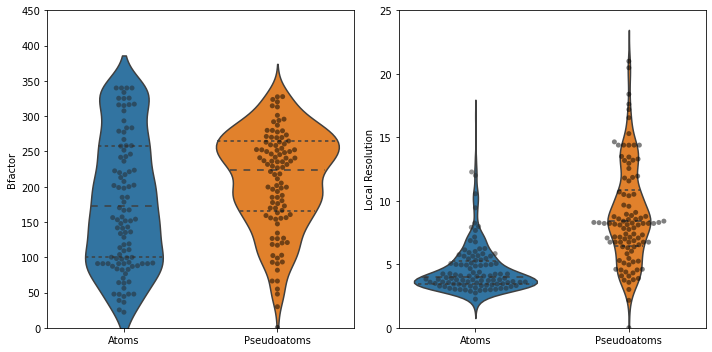

In [28]:
# plot the distribution of bfactors of atoms and pseudoatoms in one subplot and the distribution of local resolutions in the other subplot
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot([sampled_bfactors_atoms, sampled_bfactors_pseudoatoms], ax=ax[0], inner="quartile")
# show a swarmplot but only for 100 random points
resample_size = 100
sns.swarmplot([random.sample(sampled_bfactors_atoms, resample_size), random.sample(sampled_bfactors_pseudoatoms, resample_size)], ax=ax[0], color="black", alpha=0.5)
# set the x-axis tick labels
ax[0].set_xticklabels(["Atoms", "Pseudoatoms"])
ax[0].set_ylabel("Bfactor")
ax[0].set_ylim(0, 450)
sns.violinplot([sampled_resolutions_atoms, sampled_resolutions_pseudoatoms], ax=ax[1], inner="quartile")
# show a swarmplot but only for 100 random points
sns.swarmplot([random.sample(sampled_resolutions_atoms, resample_size), random.sample(sampled_resolutions_pseudoatoms, resample_size)], ax=ax[1], color="black", alpha=0.5)
# set the x-axis tick labels
ax[1].set_xticklabels(["Atoms", "Pseudoatoms"])
ax[1].set_ylabel("Local Resolution")
ax[1].set_ylim(0, 25)
plt.tight_layout()

